# 以红葡萄酒为例

有两个样本:  
`winequality-red.csv`:红葡萄酒样本  
`winequality-white.csv`:白葡萄酒样本  
每个样本都有得分从1到10的质量评分，以及若干理化检验的结果  

| # | 理化性质 | 字段名称 |
| --- | --- | --- |
| 1 | 固定酸度 | fixed acidity |
| 2 | 挥发性酸度 | volatile acidity |
| 3 | 柠檬酸 | citric acid |
| 4 | 残糖 | residual sugar |
| 5 | 氯化物 | chlorides |
| 6 | 游离二氧化硫 | free sulfur dioxide |
| 7 | 总二氧化硫 | total sulfur dioxide |
| 8 | 密度 | density |
| 9 | PH值 | pH |
| 10 | 硫酸盐 | sulphates |
| 11 | 酒精度 | alcohol |
| 12 | 质量 | quality |


## 导入数据和库依赖

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# sep参数默认逗号
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
# 查看表头
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 修改列名

发现 <font color=#0099ff>total_sulfur-dioxide</font> 这个属性命名不规范，修改一下：

In [4]:
red_df.rename(columns={"total_sulfur-dioxide":"total_sulfur_dioxide"}, inplace=True)

In [5]:
# 查看修改成功
red_df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 回答以下问题
>* 每个数据集中的样本数
>* 每个数据集中的列数
>* 具有缺少值的特征
>* 红葡萄酒数据集中的重复行
>* 数据集中的质量等级唯一值的数量
>* 红葡萄酒数据集的平均密度

In [6]:
# 查看基本信息
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# 查看样本数量
len(red_df)

1599

In [8]:
# 数据集中列数
len(red_df.columns)

12

In [9]:
# 红葡萄酒中重复行的数量
sum(red_df.duplicated())

240

In [10]:
# 质量的唯一值
len(red_df['quality'].unique())

6

In [11]:
# 红葡萄酒数据集中的平均密度
red_df['density'].mean()

0.9967466791744833

## 合并基本数据集

In [12]:
# 合并红、白葡萄酒的数据

# 为红葡萄酒数据框创建颜色数组(生成多个新行)
color_red = np.repeat("red",red_df.shape[0])

# 为白葡萄酒数据框创建颜色数组
color_white = np.repeat("white", white_df.shape[0])

In [13]:
len(color_red)

1599

In [14]:
red_df['color'] = color_red

In [15]:
# 查看新添加的列，发现添加成功
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
white_df["color"] = color_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [17]:
print(len(red_df))
print(len(white_df))

1599
4898


In [18]:
# 附加数据框
wine_df = red_df.append(white_df)

# 查看数据框，检查是否成功
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
wine_df.shape

(6497, 13)

## 保存合并后的数据集

In [20]:
# 保存自己的数据集
wine_df.to_csv("winequality_edited.csv",index=False)

In [21]:
# 设置seaborn的样式
# sns.set_style("ticks")
wine_df = pd.read_csv("winequality_edited.csv")

In [22]:
wine_df.shape

(6497, 13)

# 可视化探索

>* 根据此数据集中的列的直方图，以下哪个特征变量显示为右偏态？固定酸度、总二氧化硫、pH 值、酒精度

[hist方法详解](https://blog.csdn.net/u012111465/article/details/79375897)  
[subplot返回值理解](https://blog.csdn.net/u012762410/article/details/78968708)  
[subplot画图详解](https://blog.csdn.net/claroja/article/details/70841382)

## 绘制柱状图

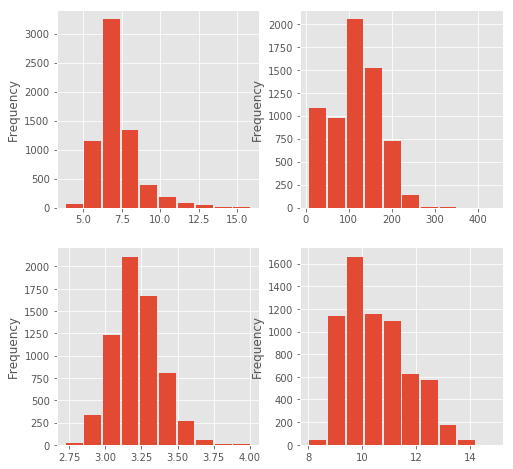

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#  _ 代表不分配名字的变量
_ = wine_df.fixed_acidity.plot.hist(ax=axs[0][0], rwidth=0.9)
_ = wine_df.total_sulfur_dioxide.plot.hist(ax=axs[0][1], rwidth=0.9)
_ = wine_df.pH.plot.hist(ax=axs[1][0], rwidth=0.9)
_ = wine_df.alcohol.plot.hist(ax=axs[1][1], rwidth=0.9)

## 偏态的判定

下图依次表示左偏态、正态、右偏态

<img src="https://ss0.baidu.com/6ONWsjip0QIZ8tyhnq/it/u=1843588542,704942196&fm=173&s=5AAA346325976DCA5EFD35CB0000C0B1&w=574&h=252&img.JPEG" width = "250" height = "500" div align=left />
<img src="https://ss0.baidu.com/6ONWsjip0QIZ8tyhnq/it/u=385087518,3453762084&fm=173&s=5EA8346301D25DC0587515DB0000C0B1&w=581&h=258&img.JPEG" width = "250" height = "500" div align=left />
<img src="https://ss0.baidu.com/6ONWsjip0QIZ8tyhnq/it/u=3611241318,2337695114&fm=173&s=1AAA742301D27DCA5E5CD5DE000080B1&w=580&h=297&img.JPEG" width = "250" height = "500" div align=left />

In [24]:
wine_df.skew(axis=0)

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

偏度值为正，则为右偏态，说明fixed_acidity、pH、alcohol都是右偏态

>* 根据质量对不同特征变量的散点图，以下哪个最有可能对质量产生积极的影响？_挥发性酸度、残糖、pH 值、酒精度

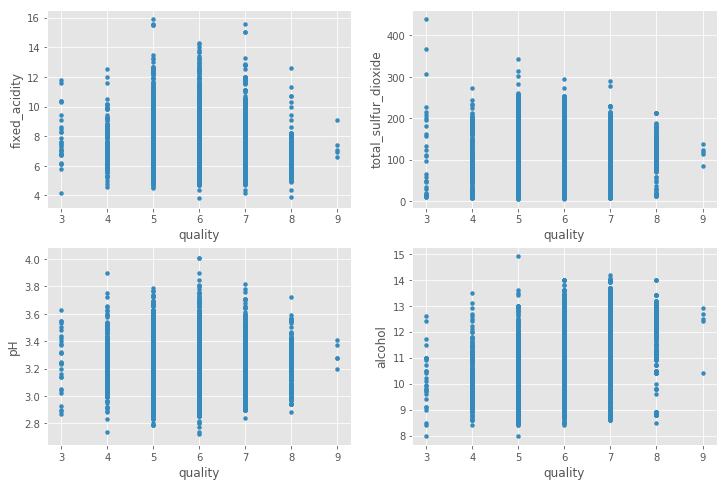

In [25]:
x = wine_df[["fixed_acidity", "total_sulfur_dioxide", "pH", "alcohol", "quality"]]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

_  = x.plot.scatter(y='fixed_acidity', x='quality', ax=axs[0][0], linewidths=0.001, marker='o')
_  = x.plot.scatter(y='total_sulfur_dioxide', x='quality', ax=axs[0][1], linewidths=0.001, marker='o')
_  = x.plot.scatter(y='pH', x='quality', ax=axs[1][0], linewidths=0.001, marker='o')
_  = x.plot.scatter(y='alcohol', x='quality', ax=axs[1][1], linewidths=0.001, marker='o')

# sns.despine()

从图上看其实并不是很明显，因此采用定量计算的方式，通过计算两个变量之间的相关系数，相关系数越大则越说明有积极影响

## 相关系数

In [26]:
sub_df = wine_df.iloc[:,np.r_[0,6,8,10,11]]
sub_df.corr()['quality']

fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
pH                      0.019506
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

发现alcohol的相关系数最大，说明起到的积极作用最大

## 查看平均值

In [27]:
wine_df.mean()

fixed_acidity             7.215307
volatile_acidity          0.339666
citric_acid               0.318633
residual_sugar            5.443235
chlorides                 0.056034
free_sulfur_dioxide      30.525319
total_sulfur_dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

## 按属性分组

In [28]:
# 按quality分组，查看每组均值
wine_df.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [29]:
# 分别以quality和color为两级索引进行分组，并查看均值
wine_df.groupby(['quality','color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [30]:
# 分组属性不作为索引
wine_df.groupby(['quality','color'], as_index=False).mean()

,quality,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [31]:
# 查看分组后pH属性所在列
wine_df.groupby(['quality','color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


### 问题 1：某种类型的葡萄酒（红葡萄酒或白葡萄酒）是否代表更高的品质？

In [32]:
# 用 groupby 计算每个酒类型（红葡萄酒和白葡萄酒）的平均质量
wine_df.groupby("color")["quality"].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

发现白葡萄酒的品质高于红葡萄酒

### 哪个酸度水平的平均评分最高？

In [33]:
# 用 Pandas 描述功能查看最小、25%、50%、75% 和 最大 pH 值
wine_df.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [34]:
# 对用于把数据“分割”成组的边缘进行分组
bin_edges = [2.72, 3.11 ,3.21 ,3.32 ,4.01 ] # 用刚才计算的五个值填充这个列表

In [35]:
# 四个酸度水平组的标签
bin_names = [ "high", "median_high", "mediam", "low"] # 对每个酸度水平类别进行命名

In [36]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or pandas.IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scalars : Defines the bin edges all

In [37]:
# 创建 acidity_levels 列
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# 检查该列是否成功创建
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,median_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,mediam
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,median_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [38]:
# 用 groupby 计算每个酸度水平的平均质量
wine_df.groupby("acidity_levels")['quality'].mean()

acidity_levels
high           5.783343
median_high    5.784540
mediam         5.850832
low            5.859593
Name: quality, dtype: float64

发现酸度越低，质量评分就越好

In [39]:
# 保存更改，供下一段使用
wine_df.to_csv('winequality_edited_al.csv', index=False)

### 酒精含量高的酒是否评分较高？

In [40]:
# 获取酒精含量的中位数
alcohol_median = wine_df.alcohol.median()

In [41]:
wine_df.head();

In [42]:
# 选择酒精含量小于中位数的样本
low_alcohol = wine_df.query("alcohol < @alcohol_median")

# 选择酒精含量大于等于中位数的样本
high_alcohol = wine_df.query("alcohol >= @alcohol_median")

In [43]:
# 获取低酒精含量组和高酒精含量组的平均质量评分
print("低浓度酒精：",low_alcohol.quality.mean())
print("高浓度酒精：", high_alcohol.quality.mean())

低浓度酒精： 5.475920679886686
高浓度酒精： 6.146084337349397


发现高浓度酒精的质量评级更高

### 口感较甜的酒是否评分较高？

In [44]:
# 获取残留糖分的中位数
sugar_median = wine_df["residual_sugar"].median()

In [45]:
# 选择残留糖分小于中位数的样本
low_sugar = wine_df.query("residual_sugar < @sugar_median")

# 选择残留糖分大于等于中位数的样本
high_sugar = wine_df.query("residual_sugar >= @sugar_median")

# 确保这些查询中的每个样本只出现一次
num_samples = wine_df.shape[0]
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # 应为真

True

In [46]:
# 获取低糖分组和高糖分组的平均质量评分
print("高糖分质量评分：",high_sugar.quality.mean())
print("低糖分质量评分：",low_sugar.quality.mean())

高糖分质量评分： 5.82782874617737
低糖分质量评分： 5.808800743724822


发现高糖分的酒质量评分更高

## 类和质量图

[Seaborn绘图示例](https://seaborn.pydata.org/examples/index.html)  
[Pandas可视化文档](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

首先查看一下两种酒的质量均值

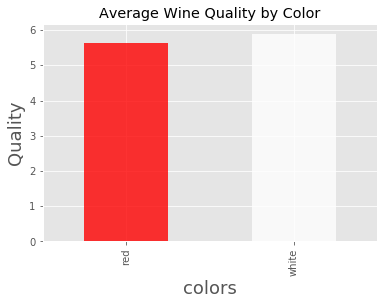

In [47]:
colors = ['red','white']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Average Wine Quality by Color', color=colors, alpha=.8)
plt.xlabel('colors', fontsize=18);
plt.ylabel('Quality', fontsize=18);

进一步按质量和颜色分组查看

Text(0, 0.5, 'Count')

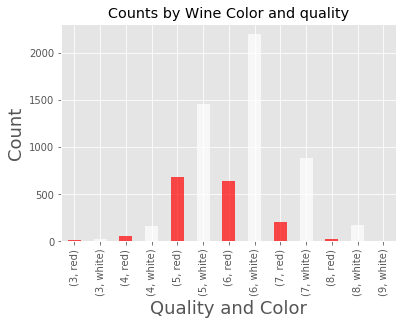

In [48]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', title='Counts by Wine Color and quality', color=counts.index.get_level_values(1), alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18)

但红酒和白酒的样本数本来就相差较大，所以我们查看比例才更准确。

Text(0, 0.5, 'Proportions')

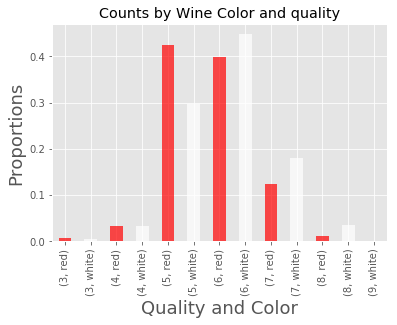

In [49]:
totals = wine_df.groupby('color').count()['pH']
counts = wine_df.groupby(['quality', 'color']).count()['pH']
proportions = counts / totals
proportions.plot(kind='bar', title='Counts by Wine Color and quality',color=counts.index.get_level_values(1), alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Proportions', fontsize=18)

## # 用 Matplotlib 创建柱状图

pyplot 的 `bar` 功能中有两个必要参数：条柱的 x 坐标和条柱的高度。

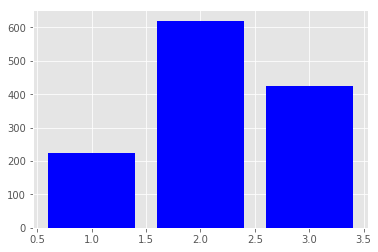

In [50]:
plt.bar([1, 2, 3], [224, 620, 425], color='blue');

可以利用 pyplot 的 `xticks` 功能，或通过在 `bar` 功能中指定另一个参数，指定 x 轴刻度标签。以下两个框的结果相同。

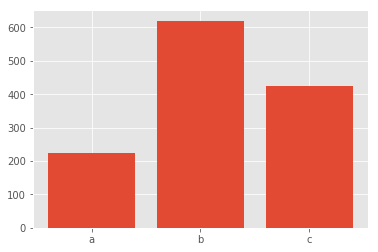

In [51]:
# 绘制条柱
plt.bar([1, 2, 3], [224, 620, 425])

# 为 x 轴指定刻度标签及其标签
plt.xticks([1, 2, 3], ['a', 'b', 'c']);

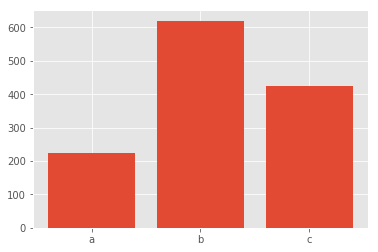

In [52]:
# 用 x 轴的刻度标签绘制条柱
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c']);

用以下方法设置轴标题和标签。

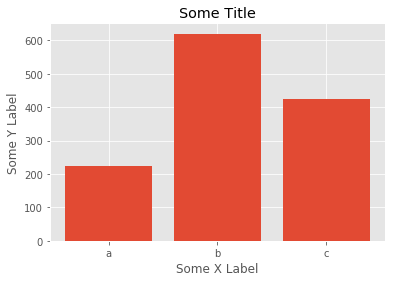

In [53]:
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c'])
plt.title('Some Title')
plt.xlabel('Some X Label')
plt.ylabel('Some Y Label');

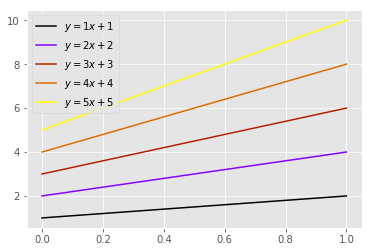

In [54]:
# example
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 10)
number = 5
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i, color in enumerate(colors, start=1):
    plt.plot(x, i * x + i, color=color, label='$y = {i}x + {i}$'.format(i=i))
plt.legend(loc='best')
plt.show()